purpose answer question 3: 
    
    Q3a: Do certain locations on the lansdcape perform better or worse?
    Q3b: Do genotypes with low predictive performance when they are moved come from common gardens with low predictive performance?
    Q3c: How can we determine if offset models are reliable given a single common garden dataset?
    

In [1]:
from pythonimports import *
from myfigs import *

import MVP_summary_functions as mvp

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.gridspec as gridspec
from scipy.stats import levene  # brown-forsythe test of equal variance

t1 = dt.now()  # notebook timer

summarydir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3'
figdir = makedir(op.join(summarydir, 'figs'))
pkldir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries/all_performance_dicts'

mvp.latest_commit()
session_info.show()

#########################################################
Today:	February 15, 2023 - 15:19:53
python version: 3.8.5

Current commit of pythonimports:
commit f7e63eead1814fe6ce13da1f593ebfb19efdc4c2  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Wed Feb 15 14:14:00 2023 -0500

Current commit of MVP_offsets:
commit caa0fefccc33fb9bba80c1589c9992c24b1ca836  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu Feb 9 10:32:41 2023 -0500
#########################################################



<a id='data'></a>
# 1. load data

[top](#home)

### get all_scores data

In [2]:
# get all_scores data
all_scores = mvp.combine_level_dicts(use_bcs_data=False)
all_source_scores = mvp.combine_level_dicts(use_bcs_data=False, performance='source_performance')

# how many validation scores per seed (= num gardens)
for program, df in all_scores.items():
    print(program, df.index.value_counts().unique())
    
# show preview of last dataframe
df.head()

reading reps (use_bcs_data = False, performance = 'garden_performance'): 100%|███████████████| 5/5 [00:07<00:00,  1.55s/it]


0-225
	 RONA num seeds =  224
	 lfmm2 num seeds =  224
	 GF num seeds =  224
	 rda num seeds =  224


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225



 RONA df.shape = (674400, 15) num_seeds = 1124 num_reps = 5

 lfmm2 df.shape = (404400, 16) num_seeds = 1124 num_reps = 5

 GF df.shape = (337200, 15) num_seeds = 1124 num_reps = 5

 rda df.shape = (1078400, 17) num_seeds = 1124 num_reps = 5


reading reps (use_bcs_data = False, performance = 'source_performance'): 100%|███████████████| 5/5 [00:06<00:00,  1.29s/it]


0-225
	 RONA num seeds =  224
	 lfmm2 num seeds =  224
	 GF num seeds =  224
	 rda num seeds =  224


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225



 RONA df.shape = (674400, 15) num_seeds = 1124 num_reps = 5

 lfmm2 df.shape = (404400, 16) num_seeds = 1124 num_reps = 5

 GF df.shape = (337200, 15) num_seeds = 1124 num_reps = 5

 rda df.shape = (1078400, 17) num_seeds = 1124 num_reps = 5
programs = ['RONA', 'lfmm2', 'GF', 'rda']
RONA [600]
lfmm2 [600 300]
GF [300]
rda [1600  800]


,garden,score,glevel,plevel,pleio,slevel,landscape,popsize,migration,marker_set,seed,simulation_level,ntraits,structcrxn,noncausal_env,offset_level,rep,simulation_garden,final_LA,cor_TPR_temp,cor_TPR_sal
1231095,1,-0.953463,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,ntraits-1,nocorr,no noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,2,-0.953463,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,ntraits-1,nocorr,no noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,3,-0.953463,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,ntraits-1,nocorr,no noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,4,-0.953463,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,ntraits-1,nocorr,no noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,5,-0.953463,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,ntraits-1,nocorr,no noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN


### get bcs scores data

In [3]:
# get bcs_scores data
bcs_scores = mvp.combine_level_dicts(use_bcs_data=True)
bcs_source_scores = mvp.combine_level_dicts(use_bcs_data=True, performance='source_performance')

reading reps (use_bcs_data = True, performance = 'garden_performance'): 100%|███████████████| 5/5 [00:09<00:00,  1.83s/it]


0-225
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


225-450
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


450-675
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


675-900
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


900-1125
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180



 RONA df.shape = (180000, 22) num_seeds = 900 num_reps = 5

 lfmm2 df.shape = (90000, 23) num_seeds = 900 num_reps = 5

 GF df.shape = (90000, 22) num_seeds = 900 num_reps = 5

 rda df.shape = (90000, 24) num_seeds = 900 num_reps = 5


reading reps (use_bcs_data = True, performance = 'source_performance'): 100%|███████████████| 5/5 [00:08<00:00,  1.70s/it]


0-225
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


225-450
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


450-675
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


675-900
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180


900-1125
	 RONA num seeds =  180
	 lfmm2 num seeds =  180
	 GF num seeds =  180
	 rda num seeds =  180



 RONA df.shape = (180000, 22) num_seeds = 900 num_reps = 5

 lfmm2 df.shape = (90000, 23) num_seeds = 900 num_reps = 5

 GF df.shape = (90000, 22) num_seeds = 900 num_reps = 5

 rda df.shape = (90000, 24) num_seeds = 900 num_reps = 5


### combine (all, bcs) in to one dataframe each, add source performance to garden performance dataframe

In [4]:
def combine_program_data(scores):
    """Combine validation score dataframes across programs into one dataframe."""
    dfs = []
    for program, df in scores.items():
        df = df.copy()

        if 'structcrxn' in df.columns.tolist():
            df = df[df['structcrxn']=='nocorr']

        if program == 'RONA':
            df['program'] = 'RONA' + '-' + df['env']

        else:
            df['program'] = program

        dfs.append(df)

    program_data = pd.concat(dfs)
    
    return program_data

In [5]:
# combine garden and source into one dataframe each
bcs_garden_data = combine_program_data(bcs_scores)
bcs_source_data = combine_program_data(bcs_source_scores)

# put source performance into df with garden performance
bcs_garden_data['source_performance'] = bcs_source_data['score'].copy()

In [6]:
# combine garden and source into one dataframe each
all_garden_data = combine_program_data(all_scores)
all_source_data = combine_program_data(all_source_scores)

# put source performance into df with garden performance
all_garden_data['source_performance'] = all_source_data['score'].copy()

In [7]:
for garden, source in [(all_garden_data, all_source_data), (bcs_garden_data, bcs_source_data)]:
    assert all(garden.columns[:-1] == source.columns)
    assert all(garden.offset_level == source.offset_level)
    assert all(garden.glevel == source.glevel)
    assert all(garden.program == source.program)

# all data 

In [8]:
def single_scatter(data, include_RONA=True, bcs=False):
    """Create scatter plot of garden vs source performance.
    
    Parameters
    ----------
    data - pd.DataFrame
    include_RONA - bool
    bcs - bool; whether to use all data or best-case scenario data
    """
    if include_RONA is False:
        data = data[data['program'].str.contains('RONA') == False].copy()
    
    # exclude RONA np.nan values - happens only with sal-opt adaptive loci sets where no loci have sig linear models
    data = data[data['score'].notnull() & data['source_performance'].notnull()]
    
    minn = data[['score', 'source_performance']].min().min()
    maxx = data[['score', 'source_performance']].max().max()
    
    fix = '' if  include_RONA is True else 'out'
    title = f'%s data with{fix} RONA' % 'bcs' if bcs is True else 'all'

    ax = scatter2d(x=data['score'],
                   y=data['source_performance'],
                   xlab="garden performance (Kendall's $\\tau$)",
                   ylab="source performance (Kendall's $\\tau$)",
                   title=title, cmap='inferno', marginal_kws={'color' : 'gray'})

    ax.ax_joint.invert_xaxis()
    ax.ax_joint.invert_yaxis()
    ax.ax_joint.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
    ax.ax_joint.axvline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)


    save_pdf(op.join(figdir, f'garden_vs_source_performance_bcs-{bcs}_RONA-{include_RONA}.pdf'))

    plt.show()
    
    pass

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/garden_vs_source_performance_bcs-False_RONA-True.pdf


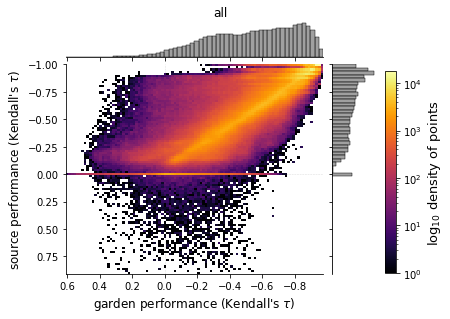

In [9]:
single_scatter(all_garden_data)

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/garden_vs_source_performance_bcs-False_RONA-False.pdf


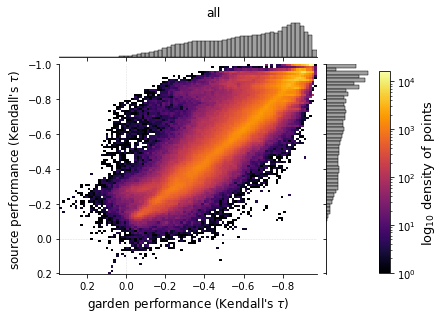

In [10]:
single_scatter(all_garden_data, include_RONA=False)

# BCS data

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/garden_vs_source_performance_bcs-True_RONA-True.pdf


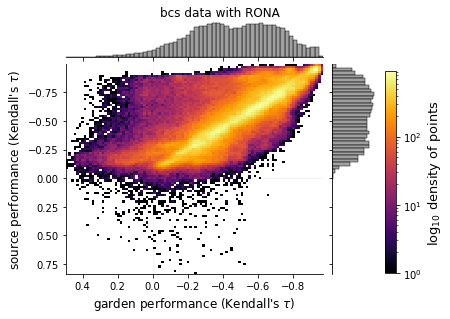

In [11]:
single_scatter(bcs_garden_data, bcs=True)

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/garden_vs_source_performance_bcs-True_RONA-False.pdf


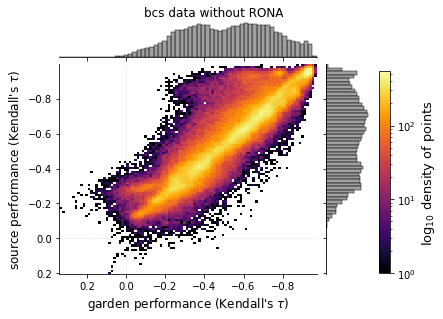

In [12]:
single_scatter(bcs_garden_data, include_RONA=False, bcs=True)

# separate the data into categories

In [13]:
def scatter_grid(data, include_RONA=True, bcs=False):
    """Split up garden vs scatter data by keys in mvp.hue_order.
    
    Parameters
    ----------
    data - pd.DataFrame
    include_RONA - bool
    bcs - bool; whether to use all data or best-case scenario data
    """
    if include_RONA is False:
        data = data[data['program'].str.contains('RONA') == False]
        
    # exclude RONA np.nan values - happens only with sal-opt adaptive loci sets where no loci have sig linear models
    data = data[data['score'].notnull() & data['source_performance'].notnull()]
    
    minn = data[['score', 'source_performance']].min().min()
    maxx = data[['score', 'source_performance']].max().max()

    for hue, hue_order in mvp.hue_order.items():
        
        if hue in ['noncausal_env', 'marker_set']:
            continue

        axes = []
        add_ylab = True
        for i, subhue in enumerate(hue_order):
            if subhue == 'RONA':
                continue
            if include_RONA is False and 'RONA' in subhue:
                continue

            df = data[data[hue] == subhue].copy()

            ax = scatter2d(x=df['score'],
                           y=df['source_performance'],
                           xlab="garden performance\n(Kendall's $\\tau$)",
                           ylab=None if add_ylab is False else "source performance\n(Kendall's $\\tau$)",
                           title=f'\n{subhue}',
                           ylim=(minn, maxx),
                           xlim=(minn, maxx),
                           cmap='inferno',
                           marginal_kws={'color' : 'gray'},
                           title_kws={'fontdict': {'color' : mvp.boxplot_kwargs['palette'][subhue],
                                                   'weight' : 'bold'}})

            ax.ax_joint.invert_xaxis()
            ax.ax_joint.invert_yaxis()
            ax.ax_joint.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
            ax.ax_joint.axvline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)

            axes.append(ax)
            add_ylab = False

        fig = plt.figure(figsize=(len(axes)*3, 3))
        gs = gridspec.GridSpec(1, len(axes))

        for ax, g in zip(axes, gs):
            _ = SeabornFig2Grid(ax, fig, g)

        if len(axes) == 2:
            left = 0.16; bottom = 0.275; right = 1; top = 1
        elif len(axes) == 3:
            left = 0.105; bottom = 0.275; right = 1; top = 1
        elif len(axes) == 4:
            left = 0.08; bottom = 0.275; right = 1; top = 1
        elif len(axes) == 5:
            left = 0.065; bottom = 0.275; right = 1; top = 1
        else:
            raise Exception("oops didn't plan for len(axes) = %s " % len(axes))
        
#         print(f'{left = } {bottom = } {right = } {top = }')
        plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=0.2, hspace=0)
        
        save_pdf(op.join(figdir, f'{hue}_grid_RONA-{include_RONA}_bcs-{bcs}.pdf'))
        
        plt.show()

    pass

### all data

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/landscape_grid_RONA-True_bcs-False.pdf


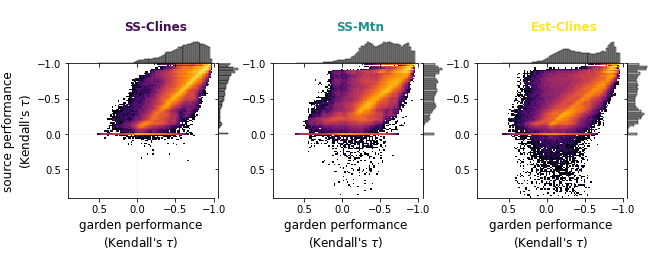

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/glevel_grid_RONA-True_bcs-False.pdf


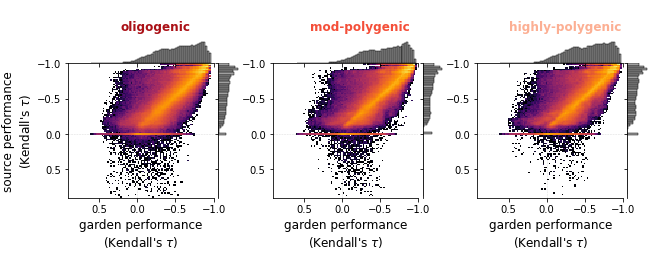

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/pleio_grid_RONA-True_bcs-False.pdf


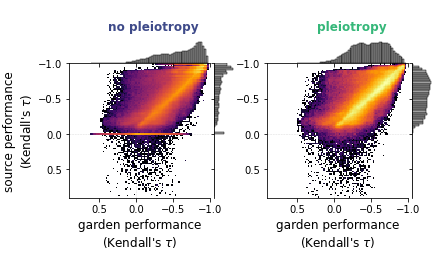

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/slevel_grid_RONA-True_bcs-False.pdf


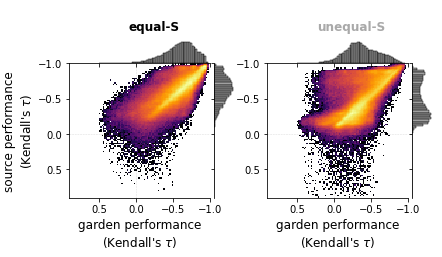

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/popsize_grid_RONA-True_bcs-False.pdf


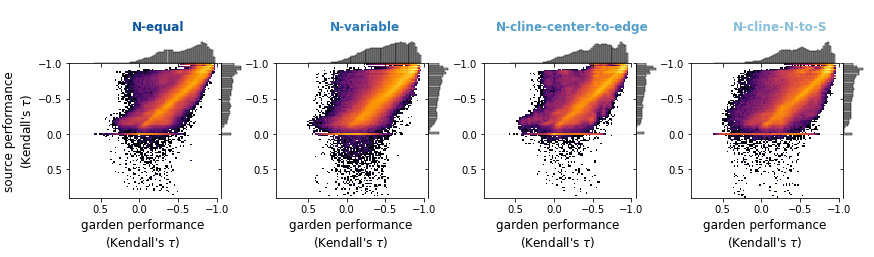

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/migration_grid_RONA-True_bcs-False.pdf


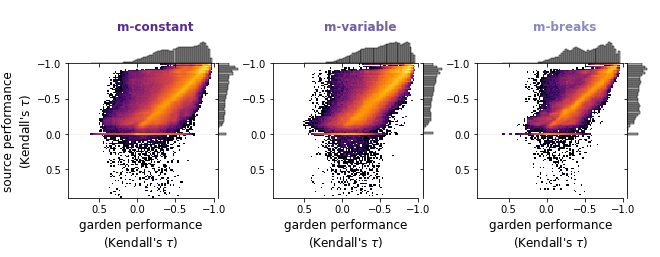

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/program_grid_RONA-True_bcs-False.pdf


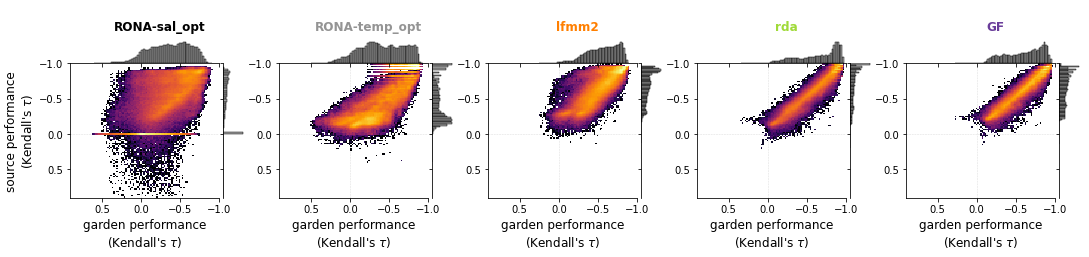

In [14]:
scatter_grid(all_garden_data)

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/landscape_grid_RONA-False_bcs-False.pdf


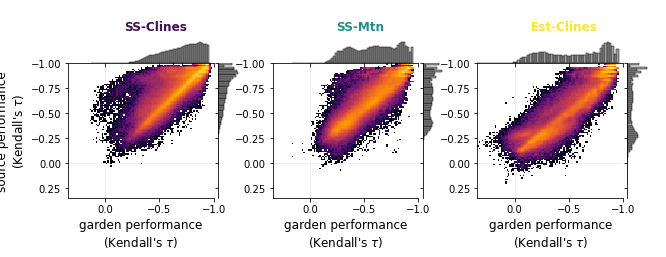

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/glevel_grid_RONA-False_bcs-False.pdf


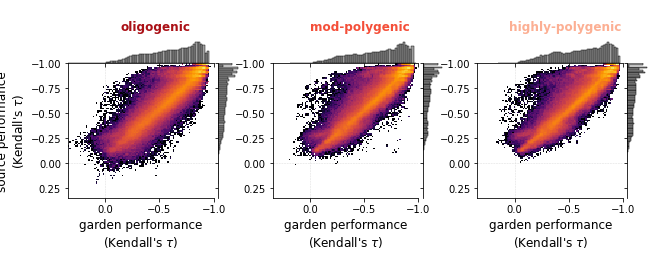

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/pleio_grid_RONA-False_bcs-False.pdf


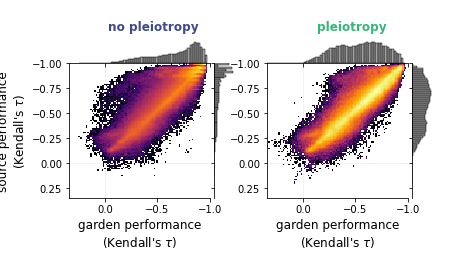

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/slevel_grid_RONA-False_bcs-False.pdf


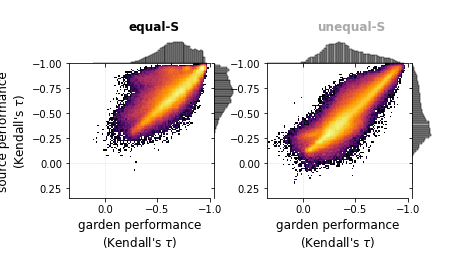

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/popsize_grid_RONA-False_bcs-False.pdf


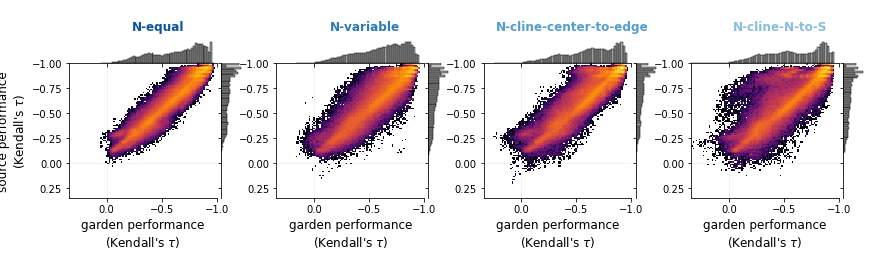

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/migration_grid_RONA-False_bcs-False.pdf


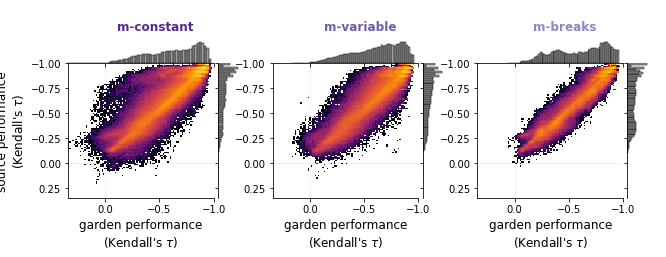

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/program_grid_RONA-False_bcs-False.pdf


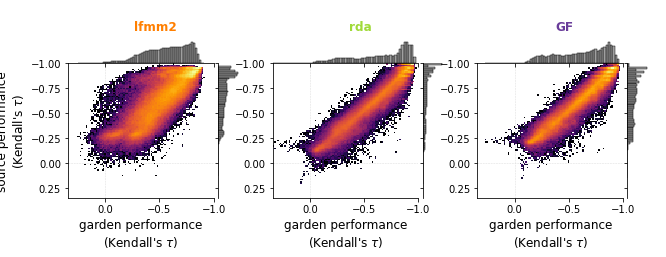

In [15]:
scatter_grid(all_garden_data, include_RONA=False)

### bcs data

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/landscape_grid_RONA-True_bcs-True.pdf


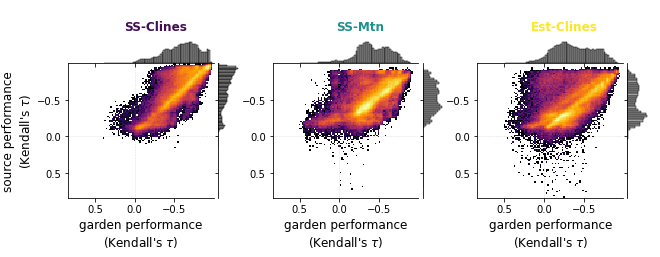

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/glevel_grid_RONA-True_bcs-True.pdf


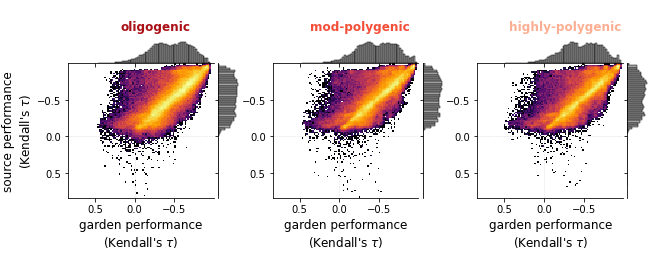

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/pleio_grid_RONA-True_bcs-True.pdf


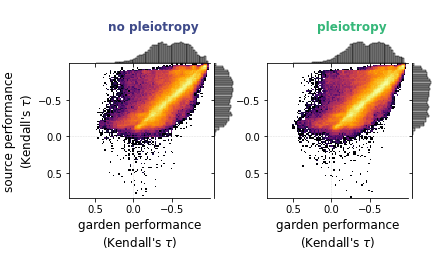

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/slevel_grid_RONA-True_bcs-True.pdf


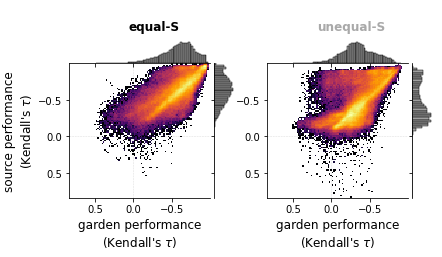

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/popsize_grid_RONA-True_bcs-True.pdf


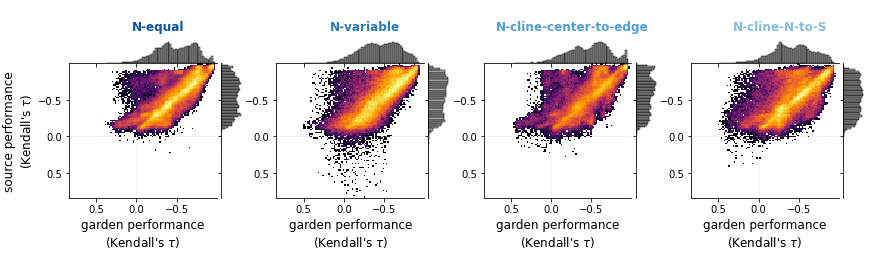

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/migration_grid_RONA-True_bcs-True.pdf


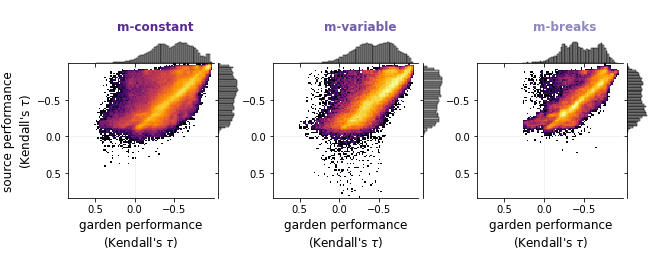

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/program_grid_RONA-True_bcs-True.pdf


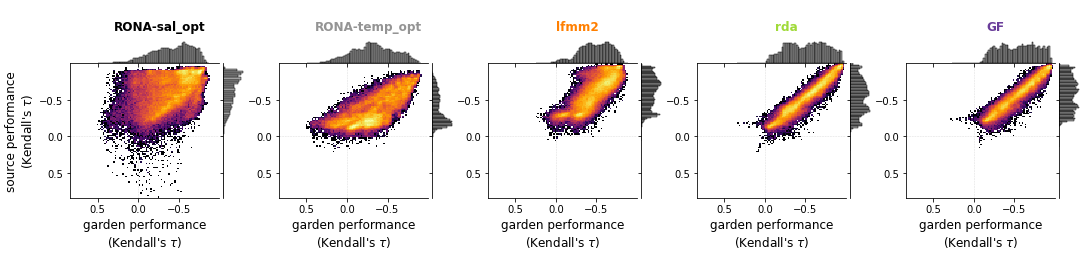

In [16]:
scatter_grid(bcs_garden_data, bcs=True)

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/landscape_grid_RONA-False_bcs-True.pdf


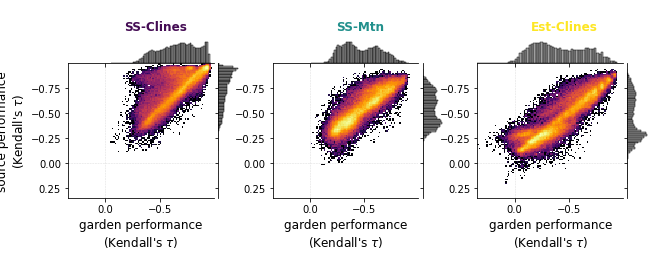

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/glevel_grid_RONA-False_bcs-True.pdf


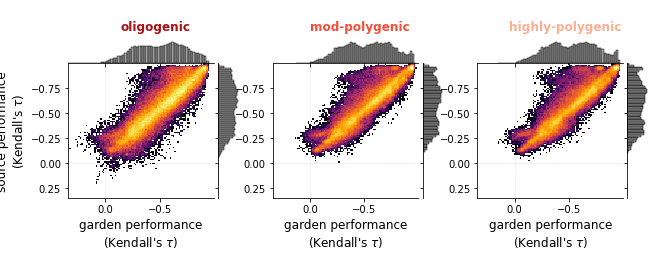

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/pleio_grid_RONA-False_bcs-True.pdf


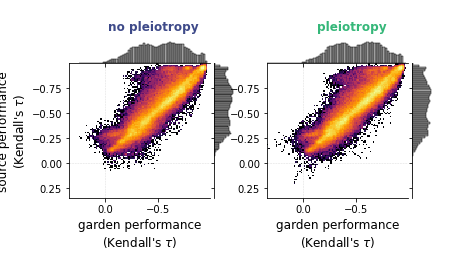

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/slevel_grid_RONA-False_bcs-True.pdf


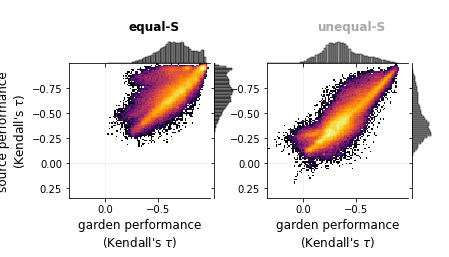

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/popsize_grid_RONA-False_bcs-True.pdf


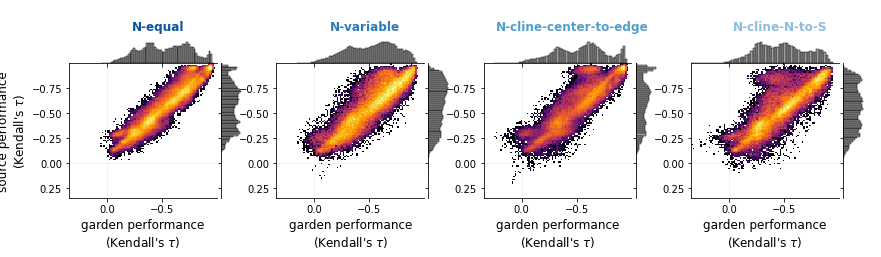

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/migration_grid_RONA-False_bcs-True.pdf


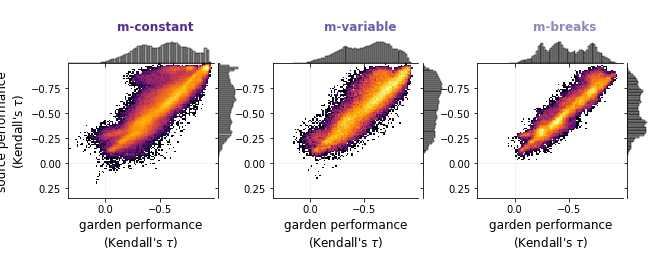

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/03_Q3/figs/program_grid_RONA-False_bcs-True.pdf


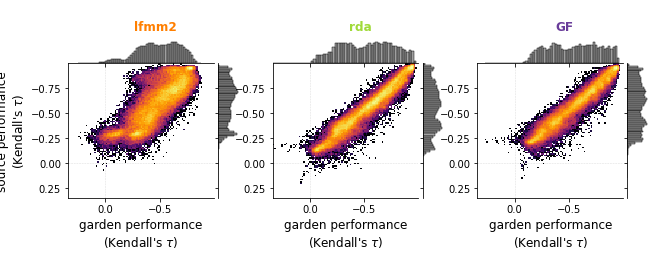

In [17]:
scatter_grid(bcs_garden_data, bcs=True, include_RONA=False)

In [18]:
formatclock(dt.now() - t1, exact=True)

'0-00:03:44'